# Importing Libraries

In [56]:
# Data analysis and visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Data Oversampling and Preprocessing Libraries
from imblearn.over_sampling import RandomOverSampler 
from sklearn.preprocessing import StandardScaler

# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
import catboost
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics / Model Evaluation
from sklearn.metrics import roc_auc_score

# Listing Files in Input Directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))# Load the training and testing datasets

/kaggle/input/playground-series-s3e4/sample_submission.csv
/kaggle/input/playground-series-s3e4/train.csv
/kaggle/input/playground-series-s3e4/test.csv


# Load the data

In [3]:
# Loading Training and Testing Data
train_df = pd.read_csv('/kaggle/input/playground-series-s3e4/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e4/test.csv')

In [4]:
# initial glimpse
train_df.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


In [5]:
test_df.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,219129,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,...,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95
1,219130,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,...,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50
2,219131,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,...,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00
3,219132,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,...,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98
4,219133,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,...,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98


# Data Exploration

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146087 entries, 0 to 146086
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      146087 non-null  int64  
 1   Time    146087 non-null  float64
 2   V1      146087 non-null  float64
 3   V2      146087 non-null  float64
 4   V3      146087 non-null  float64
 5   V4      146087 non-null  float64
 6   V5      146087 non-null  float64
 7   V6      146087 non-null  float64
 8   V7      146087 non-null  float64
 9   V8      146087 non-null  float64
 10  V9      146087 non-null  float64
 11  V10     146087 non-null  float64
 12  V11     146087 non-null  float64
 13  V12     146087 non-null  float64
 14  V13     146087 non-null  float64
 15  V14     146087 non-null  float64
 16  V15     146087 non-null  float64
 17  V16     146087 non-null  float64
 18  V17     146087 non-null  float64
 19  V18     146087 non-null  float64
 20  V19     146087 non-null  float64
 21  V20     14

In [8]:
# Display summary statistics of the target variable 'Class'
print(train_df['Class'].describe())

count    219129.000000
mean          0.002140
std           0.046214
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64


In [9]:
# Correlation Matrix
train_df.corr()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,1.000000,0.959218,-0.000277,0.047263,-0.192427,-0.045618,0.129347,0.017377,0.054348,-0.010406,...,0.019785,0.062143,0.029664,-0.015734,-0.135347,-0.035469,0.002326,-0.021846,-0.021374,0.008551
Time,0.959218,1.000000,0.020667,0.017150,-0.217963,-0.047875,0.125820,0.019394,0.048767,-0.012936,...,0.036436,0.084565,0.030906,-0.015779,-0.134160,-0.044146,-0.000651,-0.025088,-0.006316,0.006889
V1,-0.000277,0.020667,1.000000,-0.301975,-0.237078,0.060526,-0.102238,0.076384,-0.209567,-0.095881,...,-0.075561,-0.020109,-0.050983,-0.039148,0.256438,-0.000983,-0.001242,0.042269,-0.115158,-0.039251
V2,0.047263,0.017150,-0.301975,1.000000,0.038095,0.146428,0.243717,-0.082277,0.292088,0.034800,...,-0.078165,-0.032399,0.022669,0.004399,-0.150464,-0.038489,0.057503,0.008125,-0.563721,0.012451
V3,-0.192427,-0.217963,-0.237078,0.038095,1.000000,0.058966,-0.215220,-0.130293,0.052614,-0.026637,...,0.025458,0.156739,-0.030509,-0.008280,-0.153387,0.010866,0.049136,0.011003,-0.141140,-0.054008
V4,-0.045618,-0.047875,0.060526,0.146428,0.058966,1.000000,0.004642,-0.011888,0.096579,-0.002872,...,0.047631,0.054381,-0.008109,-0.048903,0.034450,-0.065007,-0.002757,0.021489,0.061920,0.027977
V5,0.129347,0.125820,-0.102238,0.243717,-0.215220,0.004642,1.000000,0.331088,0.259276,0.051261,...,-0.054922,-0.104722,-0.027975,0.047332,-0.007738,-0.048584,0.020277,-0.035526,-0.313477,0.010144
V6,0.017377,0.019394,0.076384,-0.082277,-0.130293,-0.011888,0.331088,1.000000,-0.232957,0.274289,...,0.009065,-0.015250,-0.027498,0.076797,0.103363,0.001758,0.018537,0.007954,0.076731,-0.004217
V7,0.054348,0.048767,-0.209567,0.292088,0.052614,0.096579,0.259276,-0.232957,1.000000,-0.136652,...,-0.013802,-0.080196,-0.047698,-0.011064,-0.135634,-0.032033,-0.034344,0.016396,0.186247,-0.024589
V8,-0.010406,-0.012936,-0.095881,0.034800,-0.026637,-0.002872,0.051261,0.274289,-0.136652,1.000000,...,0.005931,0.020232,0.017078,0.035852,-0.020029,0.011455,0.028751,0.011465,-0.080585,-0.037774


In [10]:
# Correlation Analysis
correlations = train_df.corr()['Class'].drop('Class')
sorted_correlations = correlations.abs().sort_values(ascending=False)
sorted_correlations

V3        0.054008
V1        0.039251
V14       0.038398
V8        0.037774
V4        0.027977
V7        0.024589
V18       0.021058
V12       0.020393
V28       0.019134
V20       0.018148
V11       0.016485
V10       0.016393
V26       0.015361
V9        0.015108
V17       0.013010
Amount    0.012909
V2        0.012451
V23       0.010955
V5        0.010144
V19       0.009408
id        0.008551
V21       0.006951
Time      0.006889
V15       0.005546
V16       0.005357
V24       0.005328
V6        0.004217
V13       0.004011
V27       0.003014
V22       0.001579
V25       0.000648
Name: Class, dtype: float64

calculating the correlation between each feature and the target variable "Class" and sorting them in descending order of absolute correlation.

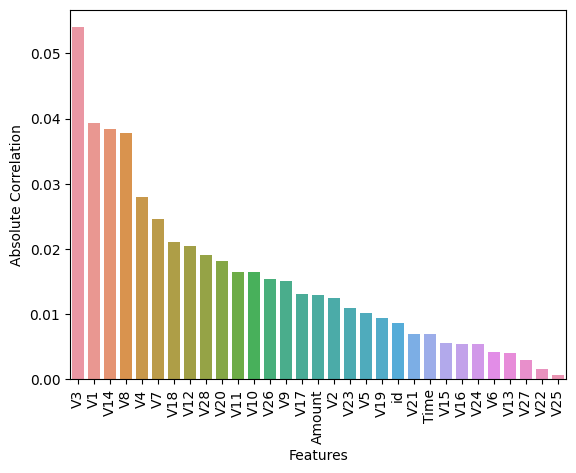

In [11]:
sns.barplot(x=sorted_correlations.index, y=sorted_correlations)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.show()

# Data Visualization

In [12]:
sns.set(style="darkgrid")

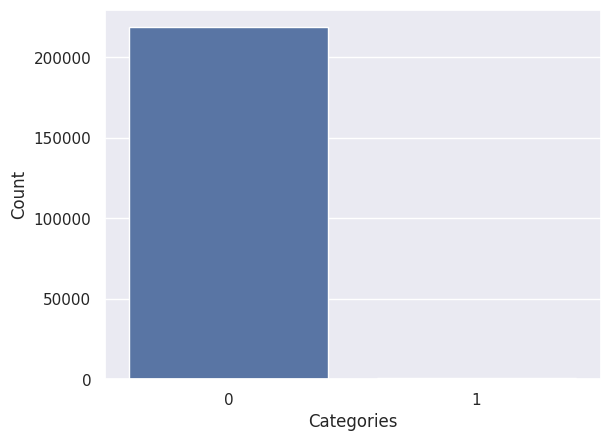

Class
0    218660
1       469
Name: count, dtype: int64

In [15]:
# Plot the distribution of the target variable
sns.countplot(data=train_df, x='Class')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()
train_df['Class'].value_counts()

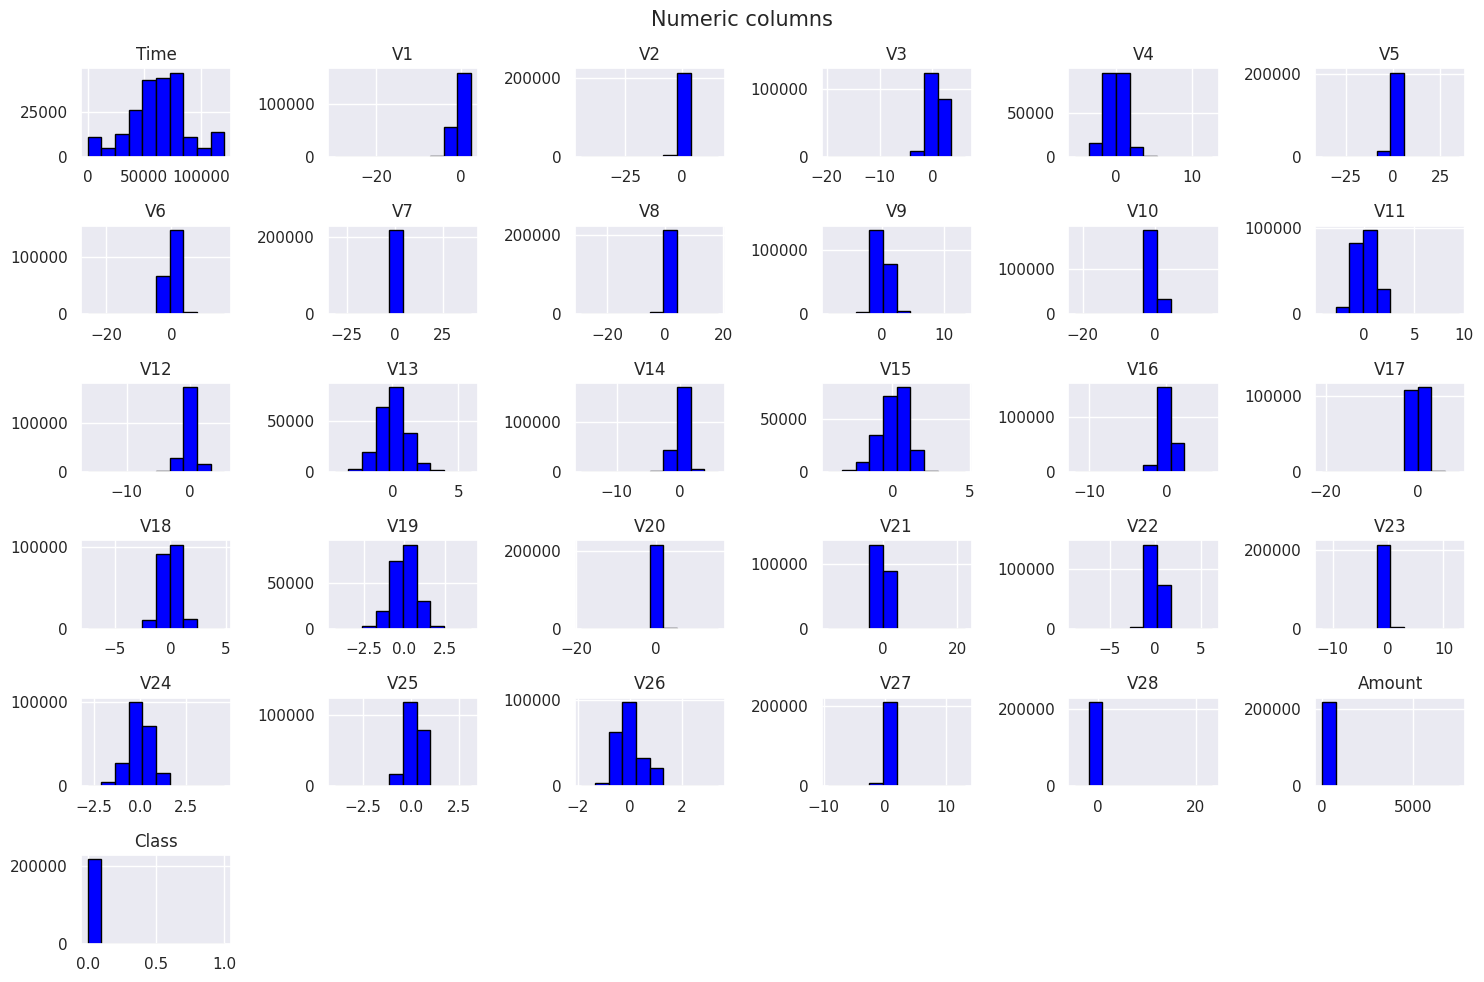

In [16]:
# Plot histograms of numeric columns
cols_to_display = train_df.columns[1:]
train_df[cols_to_display].hist(
    figsize=(15, 10), color="blue", edgecolor="black")
plt.suptitle("Numeric columns", fontsize=15)
plt.tight_layout()
plt.show()

# Data preprocessing

In [17]:
categories = train_df.select_dtypes("object").columns
categories

Index([], dtype='object')

##### all of the columns contain numerical data, so there's no need for encoding

In [18]:
# Check and display the number of missing values in each column
train_df.isnull().sum().sort_values(ascending=False)

id        0
Time      0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V16       0
V15       0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
V1        0
Class     0
dtype: int64

In [19]:
test_df.isnull().sum().sort_values(ascending=False)

id        0
V15       0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V16       0
V14       0
Time      0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
V1        0
Amount    0
dtype: int64

##### no missing values, the data is preprocessed

# Model Initialization and Training

In [22]:
# Separate target variable from features
X_train = train_df.drop('Class', axis=1)
y_train = train_df['Class']
X_test = test_df

Scaling the "time" and "amount" columns in the training data using StandardScaler.

In [25]:
sc = StandardScaler()
for col in X_train.columns:
    if col in ["time", "amount"]:
        X_train[col] = sc.fit_transform(X_train[col].values.reshape(-1, 1))

In [26]:
for col in X_test.columns:
    if col in ["time", "amount"]:
        X_test[col] = sc.transform(X_test[col].values.reshape(-1, 1))

In [32]:
# Oversampling to balance classes
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Model Training

## Logistic Regression

In [33]:
logistic_regression = LogisticRegression(
    penalty='l2',           
    C=1.0,                  
    max_iter=100,           
    solver='lbfgs',
    random_state=42
)

In [34]:
# Training the logistic regression model on the resampled data
logistic_regression.fit(X_resampled, y_resampled)

LogisticRegression(random_state=42)

## Model Evaluation

In [35]:
train_score = roc_auc_score(y_train, logistic_regression.predict(X_train), average='micro')

print(f'{logistic_regression.__class__.__name__} micro ROC training score: {train_score:.3f}')

LogisticRegression micro ROC training score: 0.721


## XGBoost

In [36]:
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)

In [37]:
# Training the model on the resampled data
xgb_classifier.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

## Model Evaluation

In [38]:
train_score = roc_auc_score(y_train, xgb_classifier.predict(X_train), average='micro')

print(f'{xgb_classifier.__class__.__name__} micro ROC training score: {train_score:.3f}')

XGBClassifier micro ROC training score: 0.865


## CatBoost

In [39]:
# Initialize the CatBoost classifier
catboost_classifier = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',  
    random_seed=42,
    verbose=100  
)

In [40]:
# Training the model on the resampled data
catboost_classifier.fit(X_resampled, y_resampled)

0:	learn: 0.6533310	total: 137ms	remaining: 1m 8s
100:	learn: 0.1702205	total: 6.76s	remaining: 26.7s
200:	learn: 0.0705436	total: 13.4s	remaining: 19.9s
300:	learn: 0.0343211	total: 19.8s	remaining: 13.1s
400:	learn: 0.0187554	total: 26.7s	remaining: 6.6s
499:	learn: 0.0109894	total: 33s	remaining: 0us


## Model Evaluation

In [41]:
train_score = roc_auc_score(y_train, catboost_classifier.predict(X_train), average='micro')

print(f'{catboost_classifier.__class__.__name__} micro ROC training score: {train_score:.3f}')

CatBoostClassifier micro ROC training score: 1.000


## LightGBM

In [42]:
params = {
    'learning_rate': 0.1,
    'n_estimators': 200,
    'max_depth': 5,
    'random_state': 42
}
lgb_classifier = lgb.LGBMClassifier(**params)

In [43]:
# Training the model on the resampled data
lgb_classifier.fit(X_resampled, y_resampled)

LGBMClassifier(max_depth=5, n_estimators=200, random_state=42)

## Model Evaluation

In [44]:
train_score = roc_auc_score(y_train, lgb_classifier.predict(X_train), average='micro')

print(f'{lgb_classifier.__class__.__name__} micro ROC training score: {train_score:.3f}')

LGBMClassifier micro ROC training score: 0.993


## Decision Tree classifier

In [53]:
params = {
    'max_depth': 5,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'random_state': 42
}
decision_tree_classifier = DecisionTreeClassifier(**params)

In [54]:
# Training the model on the resampled data
decision_tree_classifier.fit(X_resampled, y_resampled)

DecisionTreeClassifier(max_depth=5, random_state=42)

## Model Evaluation

In [55]:
train_score = roc_auc_score(y_train, decision_tree_classifier.predict(X_train), average='micro')

print(f'{decision_tree_classifier.__class__.__name__} micro ROC training score: {train_score:.3f}')

DecisionTreeClassifier micro ROC training score: 0.771


In the model selection process, various classifiers were evaluated for their performance in predicting credit card fraud. Notably, CatBoost and LightGBM achieved exceptionally high ROC AUC scores of 100% and 99%, respectively, on the training data. However, these results, while impressive, raised concerns of potential overfitting. In contrast, logistic regression, with a ROC AUC score of 72.1% on the training data, demonstrated a more balanced performance. The selection of logistic regression was favored as it showed potential for better generalization to unseen data, making it a robust choice for fraud prediction in real-world scenarios.

In [76]:
best_model = logistic_regression

# Making Predictions

In [77]:
y_pred = best_model.predict_proba(X_test)[:, 1]

In [78]:
# Generate Output DataFrame
output = pd.DataFrame(
    data={
        'id': test_df['id'],
        'Class': y_pred
    }
)
output.sample(15, random_state=42)

,id,Class
75859,294988,0.362196
5851,224980,0.237647
81403,300532,0.343814
72106,291235,0.659537
38292,257421,0.466083
198,219327,0.458327
55489,274618,0.451130
93267,312396,0.695286
89684,308813,0.344082
83147,302276,0.500261


In [79]:
# Saving the DataFrame as a csv-file
output.to_csv('submission.csv', index=False)

# Displaying a success message
print("The submission has been successfully saved.")

The submission has been successfully saved.
